In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import seaborn as sns

In [47]:
#pd.set_option('display.max_rows', None)

In [48]:
df= pd.read_excel("cardata.xls")

df.head()

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,3,2,164,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,4,2,164,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [49]:
#Lets start by understanding some of the columns present in  the dataset.

#Symboling - The refers to the insurance risk level of a car. Cars are initially assigned a risk factor symbol 
            #associated with their price, if a car presents as a great risk, this symbol is adjusted by moving
            #it up the scale. A value of +3 indicates that the car is risky, -3 that it is probably pretty safe.

#normalized-losses - This is the relative average loss payment per insured vehicle year. 
                     #This value is normalized for all autos within a particular size classification  
                     #(two-door, small, station wagons, sports/specialty, etc…).The values range from 65 to 256.      

#aspiration - This relates to how air is taken into the vechicle for combustion, it consists of the 
              #natural aspiration 'std', and the turbocaharged aspiration 'turbo'
    
#Wheel-base - A car's wheelbase is the distance between the centres of the front and rear wheels. 
              #It's therefore a smaller number than the car's full length, as measured from its front and rear end.    

#Curb-weight - The “curb weight” of a car is the weight of the vehicle without any passenger or items in it except 
               #for the standard equipment that comes with it. 
               #This is the weight of a vehicle when it's not being used and resting on a flat surface.     

#bore         -   is the inner diameter of the cylinder       

#Stroke       -  A phase of the engine's cycle (e.g. compression stroke, exhaust stroke), 
                 #during which the piston travels from top to bottom or vice versa.
                 #The type of power cycle used by a piston engine (e.g. two-stroke engine, four-stroke engine).
        
#Compression ratio - is defined as the ratio of the volume of the cylinder and its head space
                     #when the piston is at the bottom of its stroke to the volume of the head space when 
                     #the piston is at the top of its travel.
                     #Typically, petrol engines have a CR of 8–10, while diesel engines have a CR of 15–20. 
            
#horsepower-        is the metric used to indicate the power produced by a car's engine - the higher the number,
                    #the more power is sent to the wheels and, in theory, the faster it will go.  
    
#mpg-         MPG, or miles per gallon, is the distance, measured in miles, that a car can travel per gallon of fuel. 
                   #MPG is also the primary measurement of a car's fuel efficiency: 
                   #The higher a car's MPG, the more fuel efficient it is.    
                   #In European countries, it is measured in l/100km and it is a 
                   #unit that measures how many liters (l) of fuel a car consumes to travel one hundred kilometers (100km).
                   #l/100km = 235.21458333333 mpg-US

In [50]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [51]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Data Cleaning 

In [52]:
#Let's replace '?' with nan, which is panda's default missing values marker

In [53]:
df.replace("?", np.nan, inplace=True)

In [54]:
#Preview the data for change
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [55]:
#Lets identify all Missing values by column

In [56]:
missing_values = df.isnull()

missing_values.head()
#From the data, we can see that the Missing values are represented by True, while False represents Non-missing values.

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [57]:
#Let's get a more descriptive count of the missing values per columns

In [58]:
for column in missing_values.columns.values.tolist():
    print(column)
    print (missing_values[column].value_counts())
    print("")    

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

In [59]:
#Based on the summary above, each column has 205 rows of data, seven columns containing missing data:

#"normalized-losses": 41 missing data
#"num-of-doors": 2 missing data
#"bore": 4 missing data
#"stroke" : 4 missing data
#"horsepower": 2 missing data
#"peak-rpm": 2 missing data
#"price": 4 missing data

In [60]:
#They are several ways we can deal with these missing values:
#drop data
#a. drop the whole row (axis = 0)
#b. drop the whole column (axis = 1)
#replace data
#a. replace it by mean
#b. replace it by frequency
#c. replace it based on other functions

In [61]:
#Replace by mean:

#"normalized-losses": 41 missing data, replace them with mean
#"stroke": 4 missing data, replace them with mean
#"bore": 4 missing data, replace them with mean
#"horsepower": 2 missing data, replace them with mean
#"peak-rpm": 2 missing data, replace them with mean

In [62]:
#Calculate Mean for normalized-losses
norm_loss_mean = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", norm_loss_mean)

Average of normalized-losses: 122.0


In [63]:
#Replace "NaN" by mean value in "normalized-losses" column
df["normalized-losses"].replace(np.nan,norm_loss_mean, inplace=True)

In [64]:
#Lets check for duplicate values
#df.loc[df.duplicated()]

In [65]:
#Calculate Mean for stroke
stroke_mean =df["stroke"].astype("float").mean(axis=0)
print("Average of stroke:",stroke_mean)

Average of stroke: 3.2554228855721337


In [66]:
#Replace "NaN" by mean value in "stroke" column
df["stroke"].replace(np.nan,stroke_mean, inplace=True)

In [67]:
#Calculate Average bore
bore_mean = df["bore"].astype("float").mean(axis=0)
print("Average Bore:",bore_mean)                             

Average Bore: 3.3297512437810957


In [68]:
#Replace "NaN" by mean value in "bore" column
df["bore"].replace(np.nan,bore_mean, inplace=True)

In [69]:
#Calculate Average horsepower
horsepower_mean = df["horsepower"].astype("float").mean(axis=0)
print("Average Horsepower", horsepower_mean)

Average Horsepower 104.25615763546799


In [70]:
#Replace "NaN" by mean value in "horsepower" column
df["horsepower"].replace(np.nan,horsepower_mean, inplace=True)

In [71]:
#Calculate Average peak-rpm
peakrpm_mean =df["peak-rpm"].astype("float").mean(axis=0)
print("Average Peak-rpm", peakrpm_mean)

Average Peak-rpm 5125.369458128079


In [72]:
#Replace "NaN" by mean value in "peak-rpm" column
df["peak-rpm"].replace(np.nan,peakrpm_mean, inplace=True)

In [73]:
#Replace by Frequency:

In [74]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [75]:
#From above, we can see the number of cars with four and two doors respectively.
#Since four door cars have the higher frequency, lets replace the NAN values with four

In [76]:
df["num-of-doors"].replace(np.nan,'four', inplace=True)

In [77]:
df['num-of-doors'].value_counts() # we can see that the NAN values have been changed.

four    116
two      89
Name: num-of-doors, dtype: int64

In [78]:
#drop data

In [79]:
#Let's  drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

In [80]:
# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [81]:
#Let's confirm if all missing values have been treated
missing_values = df.isnull()

In [82]:
for column in missing_values.columns.values.tolist():
    print(column)
    print (missing_values[column].value_counts())
    print("")   

symboling
False    201
Name: symboling, dtype: int64

normalized-losses
False    201
Name: normalized-losses, dtype: int64

make
False    201
Name: make, dtype: int64

fuel-type
False    201
Name: fuel-type, dtype: int64

aspiration
False    201
Name: aspiration, dtype: int64

num-of-doors
False    201
Name: num-of-doors, dtype: int64

body-style
False    201
Name: body-style, dtype: int64

drive-wheels
False    201
Name: drive-wheels, dtype: int64

engine-location
False    201
Name: engine-location, dtype: int64

wheel-base
False    201
Name: wheel-base, dtype: int64

length
False    201
Name: length, dtype: int64

width
False    201
Name: width, dtype: int64

height
False    201
Name: height, dtype: int64

curb-weight
False    201
Name: curb-weight, dtype: int64

engine-type
False    201
Name: engine-type, dtype: int64

num-of-cylinders
False    201
Name: num-of-cylinders, dtype: int64

engine-size
False    201
Name: engine-size, dtype: int64

fuel-system
False    201
Name: fuel-syst

In [83]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [84]:
#Lets check is the various data types of the columns
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [85]:
#As we can see above, some columns are of incorrect data type. 
#Numerical variables should have type 'float' or 'int'. 
#Categorical data should be of  type 'object'. 
#For example, 'bore' and 'stroke' variables are numerical values that describe the engines, 
#so we should expect them to be of the type 'float' or 'int'; however, they are shown as type 'object'. 
#We have to convert data types into a proper format for each column using the "astype()" method.

In [86]:
#Type conversion
df["bore"]              = df["bore"].astype("float")
df["stroke"]            = df["stroke"].astype("float")
df["normalized-losses"] = df["normalized-losses"].astype("int")
df["price"]             = df["price"].astype("float")
df["peak-rpm"]          = df["peak-rpm"].astype("float")
df["horsepower"]        =df["horsepower"].astype("int")
df["curb-weight"]       =df["curb-weight"].astype("float")
df["city-mpg"]          =df["city-mpg"].astype("float")
df["highway-mpg"]          =df["highway-mpg"].astype("float")

In [87]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21.0,27.0,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21.0,27.0,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19.0,26.0,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24.0,30.0,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18.0,22.0,17450.0


In [88]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm             float64
city-mpg             float64
highway-mpg          float64
price                float64
dtype: object

In [89]:
df.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21.0,27.0,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21.0,27.0,16500.0


In [ ]:
#Let create bins of horsepower

In [96]:
bins_horsepower = np.linspace(min(df['horsepower']), max(df['horsepower']), 4)
bins_horsepower

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [97]:
group_horsepower = ['Low-horsepower','Mid-horsepower','High-horsepower']

In [105]:
df['horsepower-category'] = pd.cut(df['horsepower'], bins_horsepower, labels=group_horsepower, include_lowest=True)

df[['horsepower', 'horsepower-category']].head()

,horsepower,horsepower-category
0,111,Low-horsepower
1,111,Low-horsepower
2,154,Mid-horsepower
3,102,Low-horsepower
4,115,Low-horsepower


In [102]:
#Lets get how many cars we have per horsepower category
df['horsepower-category'].value_counts()

Low-horsepower     153
Mid-horsepower      43
High-horsepower      5
Name: horsepower-category, dtype: int64

In [104]:
#Let's get the car we the highest horsepower in the dataset
df[df['horsepower-category']=='High-horsepower'].max()

symboling                            3
normalized-losses                  194
make                           porsche
fuel-type                          gas
aspiration                       turbo
num-of-doors                       two
body-style                       sedan
drive-wheels                       rwd
engine-location                   rear
wheel-base                         102
length                           191.7
width                             70.6
height                            51.6
curb-weight                       3950
engine-type                       ohcv
num-of-cylinders                twelve
engine-size                        326
fuel-system                       mpfi
bore                              3.74
stroke                            3.27
compression-ratio                 11.5
horsepower                         262
peak-rpm                          5900
city-mpg                            17
highway-mpg                         25
price                    

Text(0.5, 0, 'Horsepower Categories')

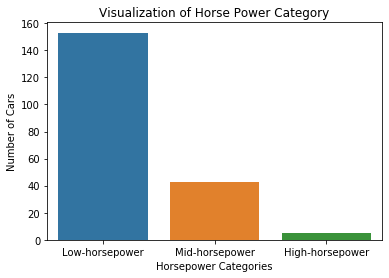

In [118]:
sns.countplot('horsepower-category', data=df)

plt.title('Visualization of Horse Power Category')
plt.ylabel('Number of Cars')
plt.xlabel('Horsepower Categories')

In [ ]:
#Let create bins of price

In [119]:
bins_price = np.linspace(min(df['price']), max(df['price']), 4)
bins_price

array([ 5118.        , 18545.33333333, 31972.66666667, 45400.        ])

In [121]:
group_price = ['Low-priced','Mid-priced','High-priced']

In [124]:
df['price-category'] = pd.cut(df['price'], bins_price, labels=group_price, include_lowest=True)

df[['price', 'price-category']].head()

,price,price-category
0,13495.0,Low-priced
1,16500.0,Low-priced
2,16500.0,Low-priced
3,13950.0,Low-priced
4,17450.0,Low-priced


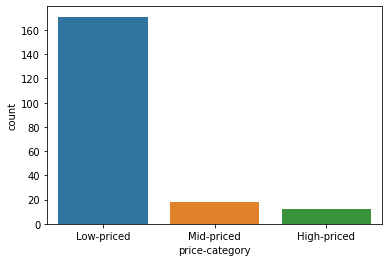

In [126]:
sns.countplot('price-category', data=df)

In [127]:
df[df['price-category']=='Low-priced'].min()

symboling                          -2
normalized-losses                  65
make                      alfa-romero
fuel-type                      diesel
aspiration                        std
num-of-doors                     four
body-style                convertible
drive-wheels                      4wd
engine-location                 front
wheel-base                       86.6
length                          141.1
width                            60.3
height                           48.8
curb-weight                      1488
engine-type                      dohc
num-of-cylinders                 five
engine-size                        61
fuel-system                      1bbl
bore                             2.54
stroke                           2.07
compression-ratio                   7
horsepower                         48
peak-rpm                         4150
city-mpg                           16
highway-mpg                        22
price                            5118
horsepower-c

Text(0.5, 0, 'Car Make')

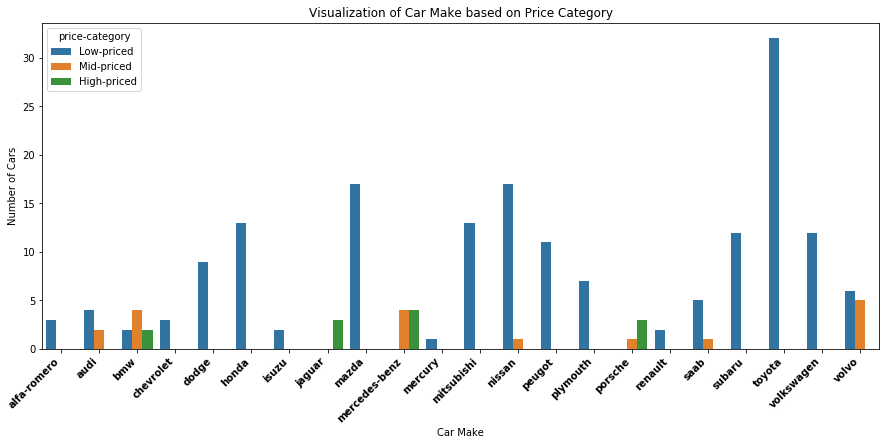

In [139]:
fig, ax = plt.subplots(figsize=(15,6))

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontweight='bold')

sns.countplot('make', data=df, hue='price-category')

plt.title('Visualization of Car Make based on Price Category')
plt.ylabel('Number of Cars')
plt.xlabel('Car Make')


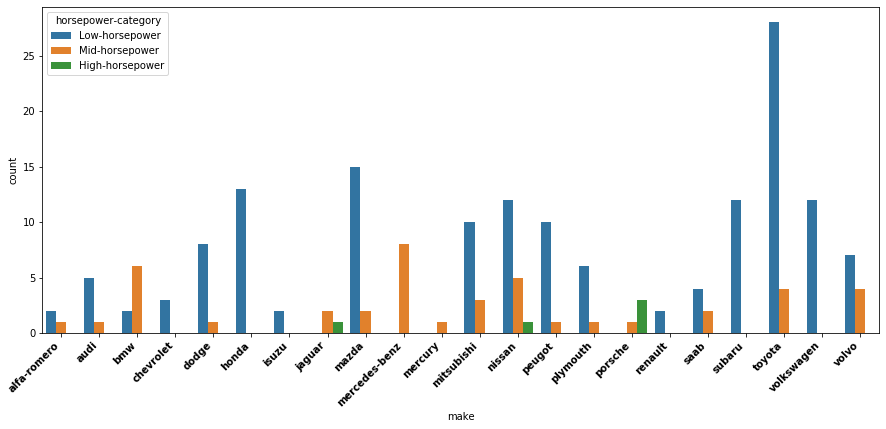

In [140]:
fig, ax = plt.subplots(figsize=(15,6))

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontweight='bold')

sns.countplot('make', data=df, hue='horsepower-category')


In [ ]:
#From above, we can see that Mercedes-benz has cars only within the Mid-horsepower range.
#Let list out the individual entries of the cars.

In [185]:
df[(df['horsepower-category'] == 'Mid-horsepower') & (df['make'] == 'mercedes-benz')]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-category,price-category
64,-1,93,mercedes-benz,diesel,turbo,four,sedan,rwd,front,110.0,...,3.58,3.64,21.5,123,4350.0,22.0,25.0,25552.0,Mid-horsepower,Mid-priced
65,-1,93,mercedes-benz,diesel,turbo,four,wagon,rwd,front,110.0,...,3.58,3.64,21.5,123,4350.0,22.0,25.0,28248.0,Mid-horsepower,Mid-priced
66,0,93,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,...,3.58,3.64,21.5,123,4350.0,22.0,25.0,28176.0,Mid-horsepower,Mid-priced
67,-1,93,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,...,3.58,3.64,21.5,123,4350.0,22.0,25.0,31600.0,Mid-horsepower,Mid-priced
68,-1,122,mercedes-benz,gas,std,four,sedan,rwd,front,115.6,...,3.46,3.10,8.3,155,4750.0,16.0,18.0,34184.0,Mid-horsepower,High-priced
69,3,142,mercedes-benz,gas,std,two,convertible,rwd,front,96.6,...,3.46,3.10,8.3,155,4750.0,16.0,18.0,35056.0,Mid-horsepower,High-priced
70,0,122,mercedes-benz,gas,std,four,sedan,rwd,front,120.9,...,3.80,3.35,8.0,184,4500.0,14.0,16.0,40960.0,Mid-horsepower,High-priced
71,1,122,mercedes-benz,gas,std,two,hardtop,rwd,front,112.0,...,3.80,3.35,8.0,184,4500.0,14.0,16.0,45400.0,Mid-horsepower,High-priced


In [186]:
#SELECTING COLUMNS BY DATA TYPES
#df.select_dtypes(include=None, exclude=None)

In [190]:
#random test: Lets return only the columns with numeric datatypes
#df.select_dtypes(include=np.number).head(2)

In [193]:
df[(df['horsepower-category'] == 'High-horsepower') & (df['price-category'] == 'Mid-priced')]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-category,price-category
102,3,194,nissan,gas,turbo,two,hatchback,rwd,front,91.3,...,3.43,3.27,7.8,200,5200.0,17.0,23.0,19699.0,High-horsepower,Mid-priced


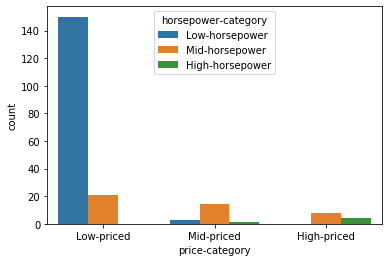

In [195]:
sns.countplot('price-category', data=df, hue='horsepower-category')

In [198]:
df[(df['horsepower-category'] == 'Low-horsepower') & (df['price-category'] == 'Mid-priced')]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-category,price-category
7,1,122,audi,gas,std,four,wagon,fwd,front,105.8,...,3.19,3.40,8.5,110,5500.0,19.0,25.0,18920.0,Low-horsepower,Mid-priced
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,3.01,3.40,23.0,106,4800.0,26.0,27.0,22470.0,Low-horsepower,Mid-priced
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,3.78,3.15,9.5,114,5400.0,19.0,25.0,22625.0,Low-horsepower,Mid-priced


In [199]:
#Let Assume we have a client who has a specify range (5k - 10k), they would like to spend on a used car
#Can we find the client something decent within the used car data?

In [205]:
client_df = df[df['price'].between(5000, 10000)].copy()

client_df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-category,price-category
17,2,121,chevrolet,gas,std,two,hatchback,fwd,front,88.4,...,2.91,3.03,9.50,48,5100.000000,47.0,53.0,5151.0,Low-horsepower,Low-priced
18,1,98,chevrolet,gas,std,two,hatchback,fwd,front,94.5,...,3.03,3.11,9.60,70,5400.000000,38.0,43.0,6295.0,Low-horsepower,Low-priced
19,0,81,chevrolet,gas,std,four,sedan,fwd,front,94.5,...,3.03,3.11,9.60,70,5400.000000,38.0,43.0,6575.0,Low-horsepower,Low-priced
20,1,118,dodge,gas,std,two,hatchback,fwd,front,93.7,...,2.97,3.23,9.41,68,5500.000000,37.0,41.0,5572.0,Low-horsepower,Low-priced
21,1,118,dodge,gas,std,two,hatchback,fwd,front,93.7,...,2.97,3.23,9.40,68,5500.000000,31.0,38.0,6377.0,Low-horsepower,Low-priced
22,1,118,dodge,gas,turbo,two,hatchback,fwd,front,93.7,...,3.03,3.39,7.60,102,5500.000000,24.0,30.0,7957.0,Low-horsepower,Low-priced
23,1,148,dodge,gas,std,four,hatchback,fwd,front,93.7,...,2.97,3.23,9.40,68,5500.000000,31.0,38.0,6229.0,Low-horsepower,Low-priced
24,1,148,dodge,gas,std,four,sedan,fwd,front,93.7,...,2.97,3.23,9.40,68,5500.000000,31.0,38.0,6692.0,Low-horsepower,Low-priced
25,1,148,dodge,gas,std,four,sedan,fwd,front,93.7,...,2.97,3.23,9.40,68,5500.000000,31.0,38.0,7609.0,Low-horsepower,Low-priced
26,1,148,dodge,gas,turbo,four,sedan,fwd,front,93.7,...,3.03,3.39,7.60,102,5500.000000,24.0,30.0,8558.0,Low-horsepower,Low-priced


In [207]:
#Within the specified price range, we can se we have 98 returns
#From the 98 returns, the client then went on to say that they are
#only interested on cars that run on gas and are also rear wheel drives(rwd)

In [210]:
client_df[(client_df['fuel-type'] =='gas') & (client_df['drive-wheels']=='rwd')]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-category,price-category
42,0,122,isuzu,gas,std,four,sedan,rwd,front,94.3,...,3.31,3.23,8.5,78,4800.0,24.0,29.0,6785.0,Low-horsepower,Low-priced
159,1,168,toyota,gas,std,two,sedan,rwd,front,94.5,...,3.19,3.03,9.0,70,4800.0,29.0,34.0,8058.0,Low-horsepower,Low-priced
160,1,168,toyota,gas,std,two,hatchback,rwd,front,94.5,...,3.19,3.03,9.0,70,4800.0,29.0,34.0,8238.0,Low-horsepower,Low-priced
161,1,168,toyota,gas,std,two,sedan,rwd,front,94.5,...,3.24,3.08,9.4,112,6600.0,26.0,29.0,9298.0,Low-horsepower,Low-priced
162,1,168,toyota,gas,std,two,hatchback,rwd,front,94.5,...,3.24,3.08,9.4,112,6600.0,26.0,29.0,9538.0,Low-horsepower,Low-priced
163,2,134,toyota,gas,std,two,hardtop,rwd,front,98.4,...,3.62,3.50,9.3,116,4800.0,24.0,30.0,8449.0,Low-horsepower,Low-priced
164,2,134,toyota,gas,std,two,hardtop,rwd,front,98.4,...,3.62,3.50,9.3,116,4800.0,24.0,30.0,9639.0,Low-horsepower,Low-priced
165,2,134,toyota,gas,std,two,hatchback,rwd,front,98.4,...,3.62,3.50,9.3,116,4800.0,24.0,30.0,9989.0,Low-horsepower,Low-priced


In [211]:
#As seen above, we are filtered through the 98 results, down to 8 that meets the client's requirements.

In [212]:
#Let Assume we have another client, who is more interested in 
#high end  cars that run on gas
#either rwd or 4wd
#not hatchback or wagon
#must be four-door

In [231]:
client_df2 = df[(df['horsepower-category'] !='Low-horsepower')  & (df['fuel-type'] == 'gas') & (df['drive-wheels'] != 'fwd')
             & (df['body-style'].isin(['hardtop', 'sedan', 'convertible']) & (df['num-of-doors']=='four') )
             ]
client_df2

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-category,price-category
12,0,188,bmw,gas,std,four,sedan,rwd,front,101.2,...,3.31,3.19,9.0,121,4250.0,21.0,28.0,21105.0,Mid-horsepower,Mid-priced
13,1,122,bmw,gas,std,four,sedan,rwd,front,103.5,...,3.31,3.19,9.0,121,4250.0,20.0,25.0,24565.0,Mid-horsepower,Mid-priced
14,0,122,bmw,gas,std,four,sedan,rwd,front,103.5,...,3.62,3.39,8.0,182,5400.0,16.0,22.0,30760.0,Mid-horsepower,Mid-priced
16,0,122,bmw,gas,std,four,sedan,rwd,front,110.0,...,3.62,3.39,8.0,182,5400.0,15.0,20.0,36880.0,Mid-horsepower,High-priced
44,0,145,jaguar,gas,std,four,sedan,rwd,front,113.0,...,3.63,4.17,8.1,176,4750.0,15.0,19.0,32250.0,Mid-horsepower,High-priced
45,0,122,jaguar,gas,std,four,sedan,rwd,front,113.0,...,3.63,4.17,8.1,176,4750.0,15.0,19.0,35550.0,Mid-horsepower,High-priced
62,0,118,mazda,gas,std,four,sedan,rwd,front,104.9,...,3.76,3.16,8.0,120,5000.0,19.0,27.0,18280.0,Mid-horsepower,Low-priced
68,-1,122,mercedes-benz,gas,std,four,sedan,rwd,front,115.6,...,3.46,3.10,8.3,155,4750.0,16.0,18.0,34184.0,Mid-horsepower,High-priced
70,0,122,mercedes-benz,gas,std,four,sedan,rwd,front,120.9,...,3.80,3.35,8.0,184,4500.0,14.0,16.0,40960.0,Mid-horsepower,High-priced
114,0,161,peugot,gas,turbo,four,sedan,rwd,front,108.0,...,3.61,3.21,7.0,142,5600.0,18.0,24.0,18150.0,Mid-horsepower,Low-priced


In [232]:
#From the client specifications, we were able to filter out 14 cars

In [235]:
client_df2[client_df2['num-of-cylinders']!='four']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-category,price-category
12,0,188,bmw,gas,std,four,sedan,rwd,front,101.2,...,3.31,3.19,9.0,121,4250.0,21.0,28.0,21105.0,Mid-horsepower,Mid-priced
13,1,122,bmw,gas,std,four,sedan,rwd,front,103.5,...,3.31,3.19,9.0,121,4250.0,20.0,25.0,24565.0,Mid-horsepower,Mid-priced
14,0,122,bmw,gas,std,four,sedan,rwd,front,103.5,...,3.62,3.39,8.0,182,5400.0,16.0,22.0,30760.0,Mid-horsepower,Mid-priced
16,0,122,bmw,gas,std,four,sedan,rwd,front,110.0,...,3.62,3.39,8.0,182,5400.0,15.0,20.0,36880.0,Mid-horsepower,High-priced
44,0,145,jaguar,gas,std,four,sedan,rwd,front,113.0,...,3.63,4.17,8.1,176,4750.0,15.0,19.0,32250.0,Mid-horsepower,High-priced
45,0,122,jaguar,gas,std,four,sedan,rwd,front,113.0,...,3.63,4.17,8.1,176,4750.0,15.0,19.0,35550.0,Mid-horsepower,High-priced
68,-1,122,mercedes-benz,gas,std,four,sedan,rwd,front,115.6,...,3.46,3.10,8.3,155,4750.0,16.0,18.0,34184.0,Mid-horsepower,High-priced
70,0,122,mercedes-benz,gas,std,four,sedan,rwd,front,120.9,...,3.80,3.35,8.0,184,4500.0,14.0,16.0,40960.0,Mid-horsepower,High-priced
176,-1,90,toyota,gas,std,four,sedan,rwd,front,104.5,...,3.27,3.35,9.2,156,5200.0,20.0,24.0,15690.0,Mid-horsepower,Low-priced
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.58,2.87,8.8,134,5500.0,18.0,23.0,21485.0,Mid-horsepower,Mid-priced
